In [4]:

"""
Solve these questions:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

"""

'\nSolve these questions:\n- Has life expectancy increased over time in the six nations?\n- Has GDP increased over time in the six nations?\n- Is there a correlation between GDP and life expectancy of a country?\n- What is the average life expectancy in these nations?\n- What is the distribution of that life expectancy?\n\n'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="white", palette=None)

In [7]:
df = pd.read_csv("all_data.csv")

In [8]:
print(df)

     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]


In [9]:
df.head(15)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [10]:
df.tail(15)

,Country,Year,Life expectancy at birth (years),GDP
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09
85,Zimbabwe,2005,44.6,5.755215e+09
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09
90,Zimbabwe,2010,52.4,1.014186e+10


In [11]:
df.shape

(96, 4)

In [12]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [14]:
countries = df['Country'].unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [15]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [16]:
listCountry = []
for i in countries:
     country = df[df["Country"] == i]
     listCountry.append(country)
listCountry[0]

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


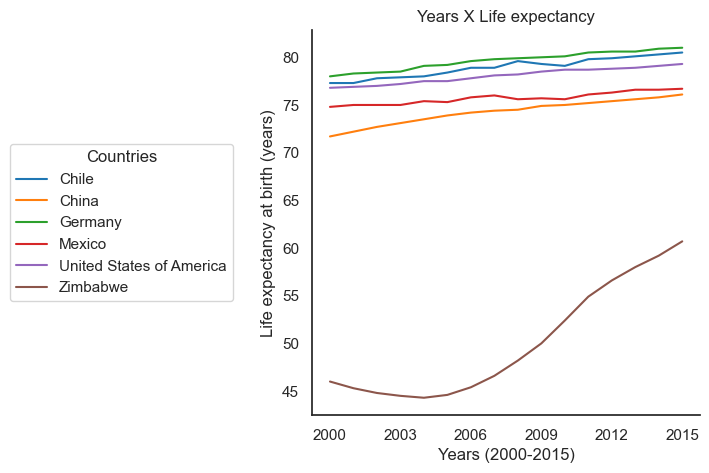

In [17]:
fig, ax = plt.subplots(figsize = (5,5))
for i in listCountry:
    plt.plot(i.Year,i["Life expectancy at birth (years)"])

plt.legend(countries,loc='center left', bbox_to_anchor=(-.8, 0.5), title = "Countries")
plt.title("Years X Life expectancy")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(range(2000,2016,3))
plt.xlabel("Years (2000-2015)")
plt.ylabel("Life expectancy at birth (years)")
plt.show()


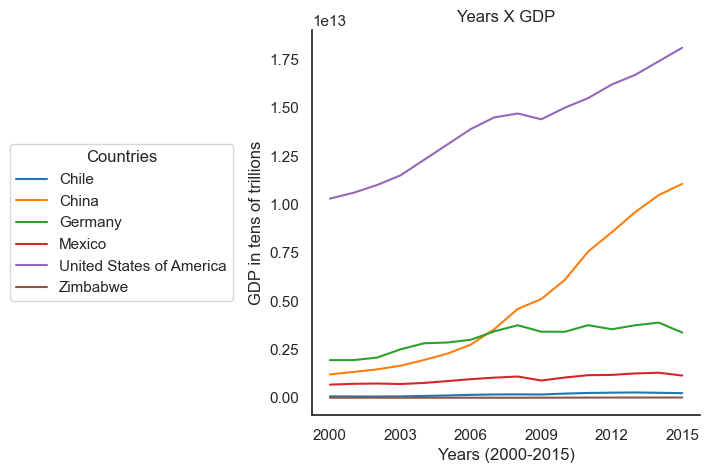

In [18]:
fig, ax = plt.subplots(figsize = (5,5))

for i in listCountry:
    plt.plot(i.Year,i.GDP)

plt.legend(countries,loc='center left', bbox_to_anchor=(-0.8, 0.5), title = "Countries")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(range(2000,2016,3))
ax.set_xticklabels(range(2000,2016,3))
plt.title("Years X GDP")
plt.xlabel("Years (2000-2015)")
plt.ylabel("GDP in tens of trillions")
plt.show()



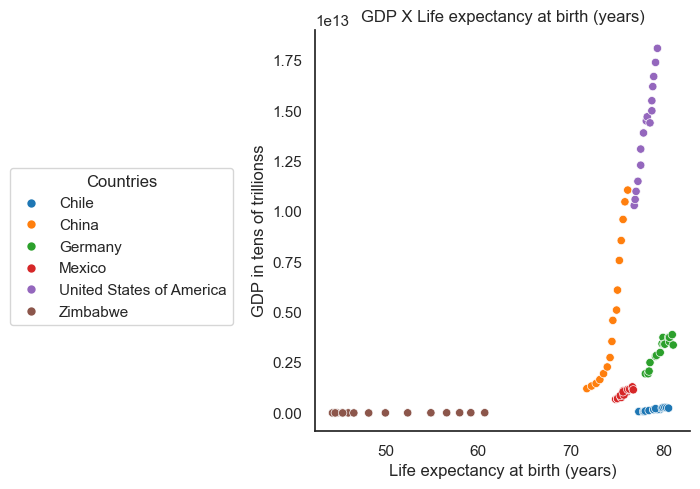

In [19]:
image = sns.relplot(data=df, x="Life expectancy at birth (years)", y="GDP", hue="Country")
image.set(ylabel='GDP in tens of trillionss', title='GDP X Life expectancy at birth (years)')
sns.move_legend(image, "center left", bbox_to_anchor=(-0.27, 0.5), title='Countries', frameon = True)
#